# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.131266e+01     8.462044e+00
 * time: 0.004606962203979492
     1     2.638695e+01     5.964437e+00
 * time: 0.0137939453125
     2     2.132587e+01     8.181757e+00
 * time: 0.03757190704345703
     3     1.236178e+01     1.937681e+00
 * time: 0.06577301025390625
     4     1.120742e+01     2.330522e+00
 * time: 0.08490395545959473
     5     1.077751e+01     1.318975e+00
 * time: 0.10380291938781738
     6     1.019899e+01     1.263643e+00
 * time: 0.12104201316833496
     7     9.655731e+00     8.579284e-01
 * time: 0.13861393928527832
     8     9.315341e+00     7.535994e-01
 * time: 0.15601301193237305
     9     9.178760e+00     4.294421e-01
 * time: 0.1735520362854004
    10     9.162175e+00     1.292534e+00
 * time: 0.18677687644958496
    11     9.150423e+00     5.931868e-01
 * time: 0.20035600662231445
    12     9.118770e+00     4.066880e-01
 * time: 0.21343398094177246
    13     9.067793e+00     4.945502e-01
 * time: 0.2

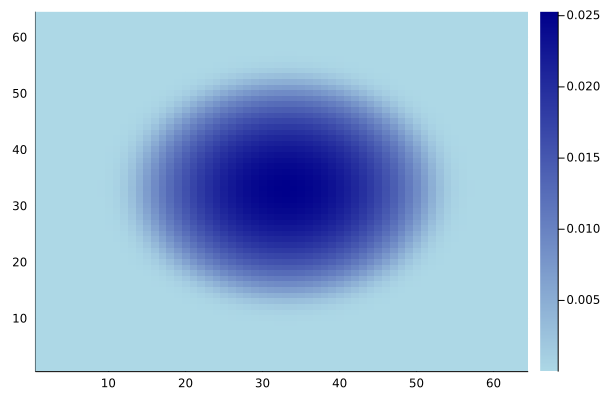

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)